**НЕБОЛЬШАЯ ТЕОРЕТИЧЕСКАЯ ЧАСТЬ:**

▎**ABC-анализ:** Этот метод используется для классификации товаров на основе их важности для бизнеса. Обычно товары делятся на три категории:


*   A: Товары, приносящие наибольшую прибыль (обычно 70-80% прибыли).
*   B: Товары со средней важностью (обычно 15-25% прибыли).
*   C: Товары с наименьшей важностью (обычно 5-10% прибыли).

▎**XYZ-анализ:** Этот метод используется для оценки стабильности спроса на товары:


*   X: Стабильный спрос.
*   Y: Умеренный спрос.
*   Z: Нестабильный спрос.

▎**RFM-анализ** оценивает клиентов по трем параметрам:


*   Recency (давность): Количество дней с момента последней покупки.
*   Frequency (частота): Количество покупок за определенный период.
*   Monetary (денежная ценность): Общая сумма покупок за определенный период.

**ШАГ 1:** Подготавливаем данные для дальнейшего анализа

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

# Загрузка данных из CSV файла
df_abcxyz = pd.read_csv('retail_sales_dataset.csv')
df_rfm = pd.read_csv('retail_sales_dataset.csv')

# Теперь удаляем пуcnые столбцы
df_abcxyz = df_abcxyz.loc[:, ~df_abcxyz.columns.str.contains('^Unnamed')]
df_rfm=df_rfm.loc[:,~df_rfm.columns.str.contains('^Unnamed')]
# Проверяем столбцы
print(df_abcxyz.columns)
print(df_rfm.columns)

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')
Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')


In [13]:
#ABC

# Группировка по продуктам и суммирование выручки
abc_data = df_abcxyz.groupby('Product Category')['Total Amount'].sum().reset_index()
abc_data.columns = ['Product Category', 'Total Revenue']

# Расчет кумулятивной суммы и процента
abc_data['Cumulative Revenue'] = abc_data['Total Revenue'].cumsum()
abc_data['Cumulative Percentage'] = abc_data['Cumulative Revenue'] / abc_data['Total Revenue'].sum() * 100

# Классификация по ABC
def classify_abc(row):
    if row['Cumulative Percentage'] <= 80:
        return 'A'
    elif row['Cumulative Percentage'] <= 95:
        return 'B'
    else:
        return 'C'

abc_data['ABC Class'] = abc_data.apply(classify_abc, axis=1)

# ----------------------------------------------------------------------------------

#XYZ

# Подсчет количества продаж по продуктам
xyz_data = df_abcxyz.groupby('Product Category')['Quantity'].count().reset_index()
xyz_data.columns = ['Product Category', 'Sales Count']

# Расчет среднего и стандартного отклонения
xyz_data['Mean'] = df_abcxyz.groupby('Product Category')['Quantity'].mean().values
xyz_data['Std Dev'] = df_abcxyz.groupby('Product Category')['Quantity'].std().values

# Расчет коэффициента вариации
xyz_data['CV'] = xyz_data['Std Dev'] / xyz_data['Mean']

# Классификация по XYZ
def classify_xyz(row):
    if row['CV'] <= 0.1:
        return 'X'
    elif row['CV'] <= 0.25:
        return 'Y'
    else:
        return 'Z'

xyz_data['XYZ Class'] = xyz_data.apply(classify_xyz, axis=1)

# Объединение результатов ABC и XYZ в исходный DataFrame
df_abcxyz = df_abcxyz.merge(abc_data[['Product Category', 'ABC Class']], on='Product Category', how='left', suffixes=('', '_abc'))
df_abcxyz = df_abcxyz.merge(xyz_data[['Product Category', 'XYZ Class']], on='Product Category', how='left', suffixes=('', '_xyz'))


# Вывод итогового DataFrame
print(df_abcxyz)

     Transaction ID        Date Customer ID  Gender  Age Product Category  \
0                 1  2023-11-24     CUST001    Male   34           Beauty   
1                 2  2023-02-27     CUST002  Female   26         Clothing   
2                 3  2023-01-13     CUST003    Male   50      Electronics   
3                 4  2023-05-21     CUST004    Male   37         Clothing   
4                 5  2023-05-06     CUST005    Male   30           Beauty   
..              ...         ...         ...     ...  ...              ...   
995             996  2023-05-16     CUST996    Male   62         Clothing   
996             997  2023-11-17     CUST997    Male   52           Beauty   
997             998  2023-10-29     CUST998  Female   23           Beauty   
998             999  2023-12-05     CUST999  Female   36      Electronics   
999            1000  2023-04-12    CUST1000    Male   47      Electronics   

     Quantity  Price per Unit  Total Amount ABC Class XYZ Class  
0        

**Шаг 2:** Расчёт показателей (+ классификация)

*   Для ABC-XYZ анализа: определите прибыльность и стабильность спроса на товары.




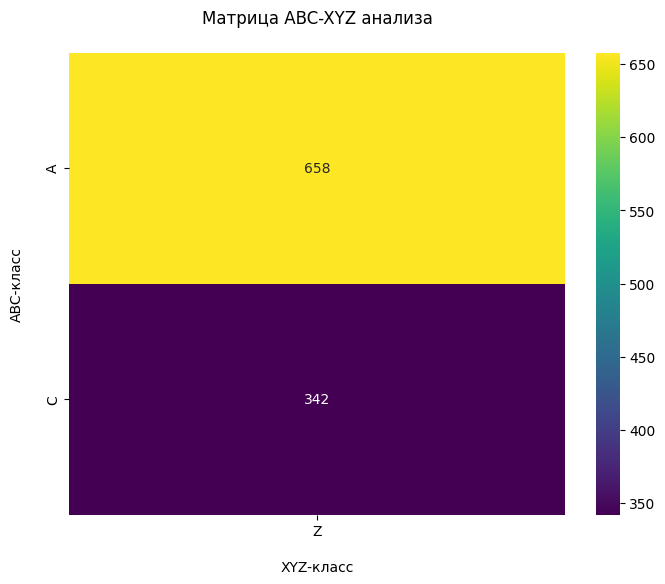

In [14]:
matrix = pd.crosstab(df_abcxyz['ABC Class'], df_abcxyz['XYZ Class'])

# Визуализация матрицы в виде тепловой карты
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt='d', cmap='viridis', cbar=True)

# Настройка заголовков
plt.title('Матрица ABC-XYZ анализа\n')
plt.xlabel('\nXYZ-класс')
plt.ylabel('ABC-класс\n')

# Показать график
plt.show()

**РЕЗУЛЬТАТЫ ABC-XYZ:**

**1.**   *ABC-анализ:*

*   Категория "Beauty" и "Clothing" попадают в класс A, что означает, что они приносят наибольшую прибыль.
*   Категория "Electronics" попадает в класс C, что говорит о том, что она менее важна с точки зрения прибыли.



In [15]:
# Результаты ABC-анализа
abc_data[['Product Category', 'Total Revenue', 'Cumulative Percentage', 'ABC Class']]

Product Category  Total Revenue  Cumulative Percentage ABC Class
0           Beauty         143515              31.472588         A
1         Clothing         155580              65.591009         A
2      Electronics         156905             100.000000         C

**2.**   *XYZ-анализ:*

*   Категории "Electronics", "Clothing" и "Beauty" имеют стабильный спрос (класс X).


In [16]:
# Результаты XYZ-анализа
xyz_data[['Product Category', 'Sales Count', 'Std Dev', 'XYZ Class']]

Product Category  Sales Count   Std Dev XYZ Class
0           Beauty          307  1.100668         Z
1         Clothing          351  1.142647         Z
2      Electronics          342  1.153084         Z



*   Для RFM-анализа: вычислите давность, частоту и денежную ценность покупок для каждого клиента.



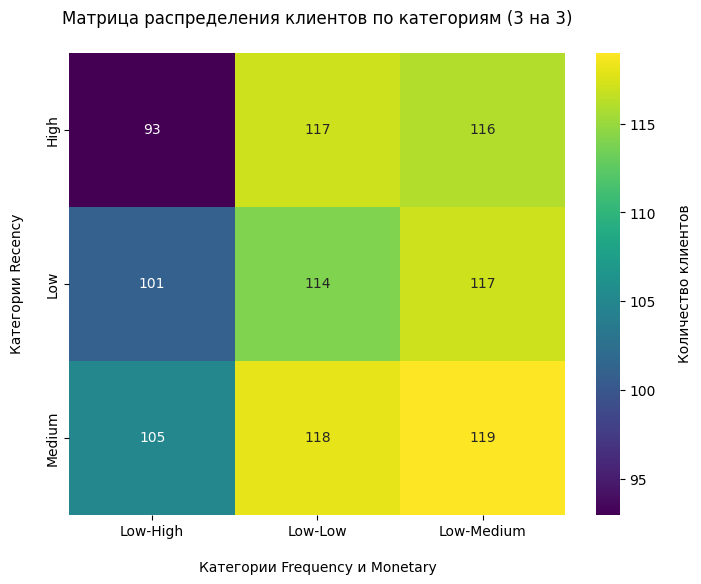

In [23]:
# Преобразование формата даты
df_rfm['Date'] = pd.to_datetime(df_rfm['Date'], format='%Y-%m-%d')

# Определяем дату последней покупки
snapshot_date = df_rfm['Date'].max() + pd.Timedelta(days=1)

# Расчет RFM метрик
rfm = df_rfm.groupby('Customer ID').agg({
    'Date': lambda x: (snapshot_date - x.max()).days,  # Recency
    'Transaction ID': 'count',                         # Frequency
    'Total Amount': 'sum'                              # Monetary
}).reset_index()

# Переименование столбцов
rfm.columns = ['Customer ID', 'Recency', 'Frequency', 'Monetary']

# Классификация по категориям
def categorize(value, thresholds):
    if value <= thresholds[0]:
        return 'Low'
    elif value <= thresholds[1]:
        return 'Medium'
    else:
        return 'High'

# Определяем пороговые значения для категорий
recency_thresholds = rfm['Recency'].quantile([0.33, 0.67]).values
frequency_thresholds = rfm['Frequency'].quantile([0.33, 0.67]).values
monetary_thresholds = rfm['Monetary'].quantile([0.33, 0.67]).values

# Применение категорий
rfm['Recency_Category'] = rfm['Recency'].apply(lambda x: categorize(x, recency_thresholds))
rfm['Frequency_Category'] = rfm['Frequency'].apply(lambda x: categorize(x, frequency_thresholds))
rfm['Monetary_Category'] = rfm['Monetary'].apply(lambda x: categorize(x, monetary_thresholds))

# Объединение RFM данных с исходным DataFrame
df_rfm = df_rfm.merge(rfm[['Customer ID', 'Recency', 'Frequency', 'Monetary',
                             'Recency_Category', 'Frequency_Category', 'Monetary_Category']],
                       on='Customer ID', how='left')



# Визуализация
plt.figure(figsize=(8, 6))
pivot_table = rfm.pivot_table(index='Recency_Category',
                               columns=['Frequency_Category', 'Monetary_Category'],
                               values='Customer ID', aggfunc='count', fill_value=0)

sns.heatmap(pivot_table, annot=True, fmt='d', cmap='viridis', cbar_kws={'label': '\nКоличество клиентов'})
plt.title('Матрица распределения клиентов по категориям (3 на 3)\n')
plt.xlabel('\nКатегории Frequency и Monetary')
plt.ylabel('Категории Recency\n')
plt.show()

**РЕЗУЛЬТАТЫ RFM-анализ:**

---

▎Интерпретация показателей RFM

*1.   Recency (Недавность):*

*   Значения Recency варьируются от 28 до 354 дней.
*   Низкие значения (например, CUST999 с Recency = 28) указывают на то, что клиент недавно совершал покупки, что делает его более ценным и вовлеченным.
*   Высокие значения (например, CUST003 с Recency = 354) показывают, что клиент не покупал в течение длительного времени, что может сигнализировать о потере интереса.

*2.   Frequency (Частота):*


*   Все клиенты имеют частоту покупок равную 1. Это означает, что каждый клиент совершил только одну покупку за рассматриваемый период.
*   Низкая частота может указывать на то, что клиенты не возвращаются для повторных покупок, что требует внимания со стороны маркетинга для увеличения вовлеченности.

*3. Monetary (Денежный объем):*

*   Значения Monetary варьируются от 30 до 1000.

*   Клиенты с высоким денежным объемом (например, CUST002 с Monetary = 1000) являются особенно ценными для бизнеса. Их стоит поощрять и удерживать.

*   Клиенты с низким денежным объемом (например, CUST003 с Monetary = 30) могут не быть прибыльными, и важно выяснить причины их низкой траты.


---

▎Сегментация клиентов

На основе анализа RFM можно выделить несколько сегментов клиентов:

*1. Ценные клиенты:*

*   CUST002: Высокая стоимость (Monetary = 1000), но высокая недавность (Recency = 309). Это клиент, который сделал значительную покупку, но не возвращается. Необходимо разработать стратегии для повторного вовлечения.

*2. Рискованные клиенты:*

*   CUST003: Очень высокая недавность (Recency = 354) и низкая стоимость (Monetary = 30). Этот клиент требует особого внимания, так как он не совершал покупок долгое время и потратил очень мало.

*3. Новые клиенты:*

*   CUST999: Низкая недавность (Recency = 28) и средняя стоимость (Monetary = 150). Это новый клиент, который активно взаимодействует с бизнесом. Нужно поддерживать его вовлеченность через специальные предложения.

*4. Клиенты с низкой активностью:*

*   Большинство клиентов имеют частоту равную 1 и могут быть отнесены к этой категории. Это сигнализирует о необходимости улучшения маркетинговых стратегий для повышения частоты покупок.

---

▎Рекомендации

*1. Для ценных клиентов:*

*    Разработайте программы лояльности и специальные предложения для удержания таких клиентов.

*    Проведите опросы для выяснения причин их низкой активности.

*2. Для рискованных клиентов:*

*    Запустите кампании по повторному вовлечению, предлагая скидки или специальные предложения.

*    Изучите отзывы клиентов для понимания причин их низкой активности.

*3. Для новых клиентов:*

*    Предложите приветственные скидки или бонусы для стимулирования повторных покупок.

*    Поддерживайте контакт через email-маркетинг и социальные сети.

*4. Для клиентов с низкой активностью:*

*    Проведите анализ продуктов, которые они приобрели, и предложите сопутствующие товары или услуги.

*    Используйте целевые рекламные кампании для повышения частоты покупок.


In [18]:
# Результаты RFM-анализа
df_rfm[['Customer ID', 'Recency', 'Frequency', 'Monetary']]

Customer ID  Recency  Frequency  Monetary
0       CUST001       39          1       150
1       CUST002      309          1      1000
2       CUST003      354          1        30
3       CUST004      226          1       500
4       CUST005      241          1       100
..          ...      ...        ...       ...
995     CUST996      231          1        50
996     CUST997       46          1        90
997     CUST998       65          1       100
998     CUST999       28          1       150
999    CUST1000      265          1       120

[1000 rows x 4 columns]

**ШАГ 3:** Сегментированные данные в виде диаграммы

In [19]:
import plotly.express as px

# Группировка по продуктам и суммирование выручки
product_data = df_abcxyz.groupby('Product Category')['Total Amount'].sum().reset_index()

# Создаем диаграмму дерева
fig = px.treemap(product_data, path=['Product Category'], values='Total Amount', title='Диаграмма дерева по товарам')
fig.show()

**ШАГ 4:** Обогащение датасета

In [34]:
# COхранить обновленный DataFrame обратно в файл можно через метод to_csv()
dataf_abcxyz = pd.DataFrame(df_abcxyz)
dataf_rfm = pd.DataFrame(df_rfm)

# Объединение DataFrame по 'Customer ID'
df_combined = pd.merge(dataf_abcxyz, dataf_rfm, on='Customer ID')

df_combined.to_csv('updated_retail_sales_dataset.csv', index=False)